## Logistic Regression on DIGITS identification from an image

In [15]:
from sklearn.datasets import load_digits

In [16]:
digits=load_digits()
print(type(digits))
print(type(digits.data))
print(digits.data.shape)
print(digits.target.shape)

<class 'sklearn.utils.Bunch'>
<class 'numpy.ndarray'>
(1797, 64)
(1797,)


In [40]:
digits.data[0:5,0:5]

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [42]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [46]:
(digits.target_names)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Zip & Enumerate function

so basically zip function, takes in iterables as arguments and returns an iterator. This iterator generates a series 
of tuples containing elements from each iterable. zip() can accept any type of iterable, such as files, lists, 
tuples, dictionaries, sets, and so on. It creates an iterator that will aggregate elements from two or more iterables. You can use the resulting iterator to quickly and consistently solve common programming problems, like creating dictionaries.
 
 more info: https://realpython.com/python-zip-function/

In [19]:
#prct
zipObj= zip(range(5), ['a','b','c','d','e'],range(20,25))
print(zipObj)
print('{0}'.format(type(zipObj)))
enmrtObj= enumerate(zip(range(5), ['a','b','c','d','e'],range(20,25)))
print(enmrtObj)
print('{0}\n'.format(type(enmrtObj)))
      
for indexsss, (image,label,range3) in enumerate(zip(range(5), ['a','b','c','d','e'],range(20,25))):
    print('index: {0}'.format(indexsss))
    print('range1: {0}, range2: {1}, range3: {2},\n'.format(image,label,range3))    


<class 'zip'>
<class 'enumerate'>

index: 0
range1: 0, range2: a, range3: 20,

index: 1
range1: 1, range2: b, range3: 21,

index: 2
range1: 2, range2: c, range3: 22,

index: 3
range1: 3, range2: d, range3: 23,

index: 4
range1: 4, range2: e, range3: 24,



[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]
<class 'numpy.ndarray'>
[ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
  3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
 16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]


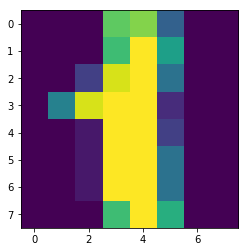

In [20]:
#prct
plt.figure(figsize=(20,4))
test=np.reshape(digits.data[1],(8,8))
print(test)
print(type(test))
print(digits.data[1])
plt.imshow(test)

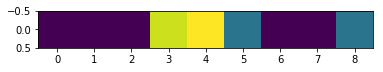

<Figure size 1440x2880 with 0 Axes>

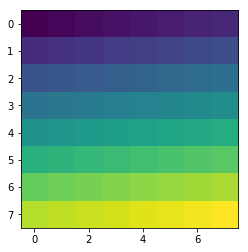

In [21]:
#prct
plt.imshow([[0., 0., 0., 12., 13., 5., 0., 0.,5]])
lst=list()
plt.figure(figsize=(20,40))
# for index in range(250):
#     plt.subplot(50,5,index+1)
#     plt.imshow([[index]])
#     lst.append(index)
#     plt.title('{0}'.format(index))
#     index+=1

# npArr=np.arange(0,256).reshape(8,32)
# npArr
# plt.imshow(npArr)
plt.figure(figsize=(40,4))
npArr2=np.arange(0,64).reshape(8,8)
npArr2
plt.imshow(npArr2)

[ 0.  2. 14. 16. 16. 13.  5.  0.  0.  7. 16. 13.  8.  8.  1.  0.  0. 10.
 15.  0.  0.  0.  0.  0.  0. 10. 16.  0.  0.  0.  0.  0.  0.  7. 16.  6.
  0.  0.  0.  0.  0.  1. 12. 16.  8.  0.  0.  0.  0.  1.  8. 16. 10.  0.
  0.  0.  0.  3. 16. 15.  1.  0.  0.  0.]


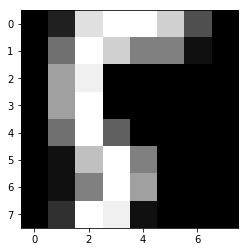

In [48]:
#prct
print(digits.data[155])
plt.imshow(np.reshape(digits.data[155],(8,8)),cmap=plt.cm.gray)

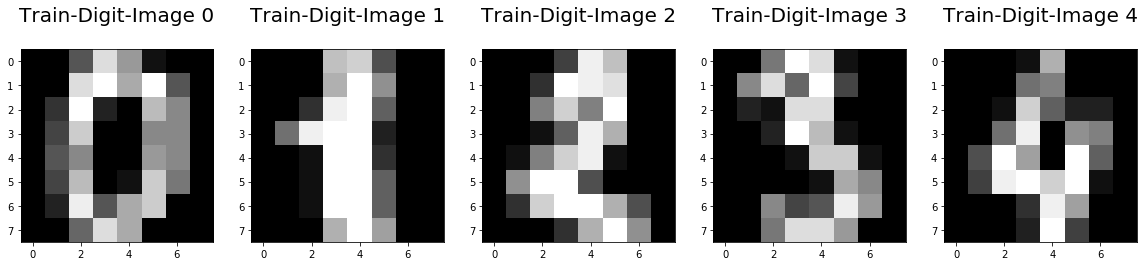

In [23]:
plt.figure(figsize=(20,4))
for index, (image,label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title('Train-Digit-Image %i\n' % label, fontsize=20)
    

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.23,random_state=2)


In [25]:
x_train.shape

(1383, 64)

In [26]:
x_test.shape

(414, 64)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
logModel=LogisticRegression()
logModel.fit(x_train,y_train)

C:\Users\prathap\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\prathap\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [29]:
predictions=logModel.predict(x_test)
predictions[0:5]

array([4, 0, 9, 1, 8])

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
accuracy=confusion_matrix(predictions,y_test)

In [32]:
accuracy

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 44,  0,  0,  2,  0,  0,  0,  2,  0],
       [ 0,  0, 43,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0, 37,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 40,  0,  0,  0],
       [ 0,  0,  0,  3,  0,  0,  0, 45,  0,  1],
       [ 0,  2,  0,  2,  1,  0,  1,  1, 35,  3],
       [ 0,  1,  0,  0,  1,  0,  0,  0,  1, 28]], dtype=int64)

In [33]:
score=logModel.score(x_test,y_test)
score

0.9420289855072463

In [34]:
import seaborn as sns

Text(0.5, 1.0, 'Accuracy Score: 94.20289855072464 %')

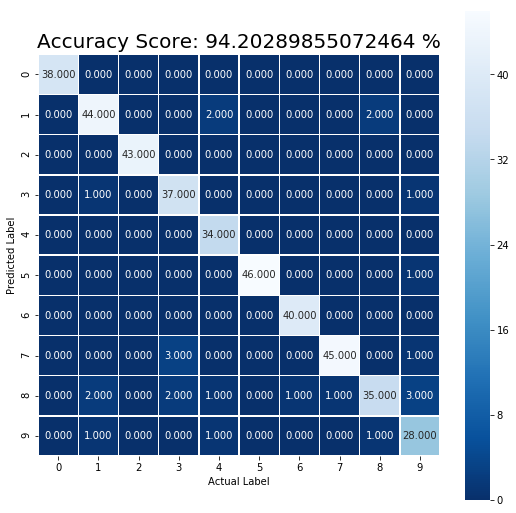

In [35]:
plt.figure(figsize=(9,9))
sns.heatmap(accuracy,annot=True,cmap='Blues_r',square=True,fmt='0.3f',linewidths=.5)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
s_title='Accuracy Score: {0} %'.format((score*100))
plt.title(s_title,fontsize=20)

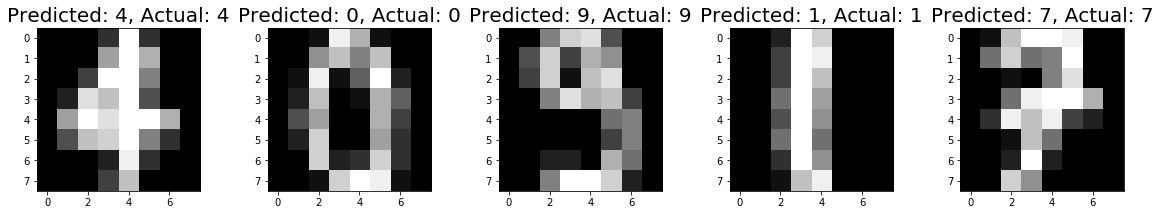

In [36]:
index=0;
classifiedIndex=[]
for predict, actual in zip(predictions,y_test):
    if(predict==actual):
        classifiedIndex.append(index)
    index+=1    
    
plt.figure(figsize=(20,3))
for plotindex, wrong in enumerate(classifiedIndex[0:5]):
    plt.subplot(1,5,plotindex+1)
    plt.imshow(np.reshape(x_test[wrong],(8,8)),cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}' .format(predictions[wrong],y_test[wrong],), fontsize=20)

In [37]:
#prct
len(classifiedIndex)

390

In [38]:
#prct
import pandas as pd
digitsDataDF=pd.DataFrame(data=digits.data)
digitsDataDF.to_excel('E:\\SL\\ai\\sample data files\\digitsIdentification_dataset_exported\\digitsData.xlsx')
digitsLabelDF=pd.DataFrame(data=digits.target)
digitsLabelDF.to_excel('E:\\SL\\ai\\sample data files\\digitsIdentification_dataset_exported\\digitsLabels.xlsx')

In [39]:
#prct
print(x_test[0:1,0:10])
print(y_test[0:10])
print(predictions[0:10])
print('----------------------')
print(digits.data[0:1,0:10])
digits.target[0:100]

[[ 0.  0.  0.  3. 16.  3.  0.  0.  0.  0.]]
[4 0 9 1 4 7 1 5 1 6]
[4 0 9 1 8 7 1 5 1 6]
----------------------
[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0.]]


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6,
       6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4,
       6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1])